In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')

In [57]:
df_glob = pd.read_csv('ANLSYS2/STROMAL/ACT_glob2.csv',index_col = 0)
df_ind = pd.read_csv('ANLSYS2/STROMAL/ACT_ind2.csv',index_col = 0)

df_glob['global_order']= df_glob.global_order / 1350
# df_glob['local_order'] = df_glob.lcl_order/ 1350

df_glob2 = pd.read_csv('ANLSYS2/STROMAL/PRFDR_glob.csv',index_col = 0)
df_ind2 = pd.read_csv('ANLSYS2/STROMAL/PRFDR_ind.csv',index_col = 0)

df_glob2['global_order']= df_glob2.global_order / 1350
# df_glob2['local_order'] = df_glob2.lcl_order/ 1350

# change name of PW

# df_ind[df_ind.type == 'PW'] = 'BA-cl'
# df_glob[df_glob.type == 'PW'].type = 'BA-cl'
# df_ind2[df_ind2.type == 'PW'].type = 'BA-cl'
# df_glob2[df_glob2.type == 'PW'] = 'BA-cl'

df_ind['model'] = 'act'
df_glob['model'] = 'act'
df_ind2['model'] = 'PRFDR'
df_glob2['model'] = 'PRFRDR'

df_ind.head()

,type,iter,cell_id,speed,persist,model
0,ER,4,0,5.404857,22.918665,act
1,ER,4,1,5.544220,100.000000,act
2,ER,4,2,5.578316,86.707556,act
3,ER,4,3,5.522558,32.653592,act
4,ER,4,4,5.441544,100.000000,act


In [79]:
mergd  = pd.concat([df_ind, df_ind2])
mergd = mergd.replace('PW', value = 'BA-cl')

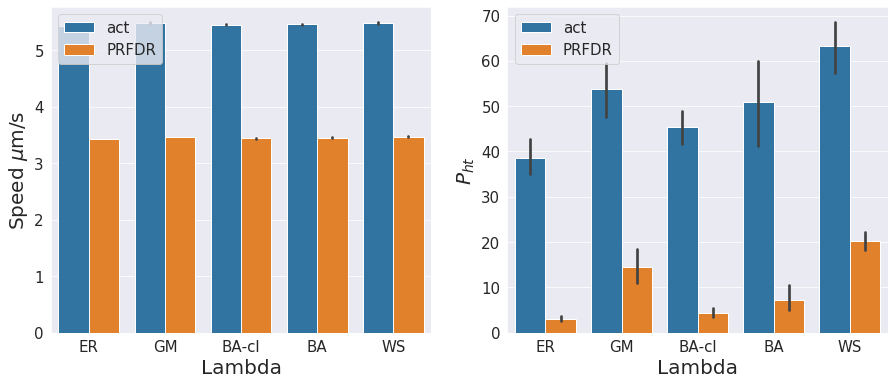

In [81]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'type',y = 'persist',units = 'iter',data = mergd, hue = 'model',ax = ax2)
sns.barplot(x = 'type',y = 'speed',units = 'iter',data = mergd, hue = 'model', ax = ax1)

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)

ax1.legend(fontsize = 15,loc = 2)
ax2.legend(fontsize = 15,loc = 2)
plt.show()

In [72]:
mergd  = pd.concat([df_glob, df_glob2])
mergd = mergd.replace('PW', value = 'BA-cl')

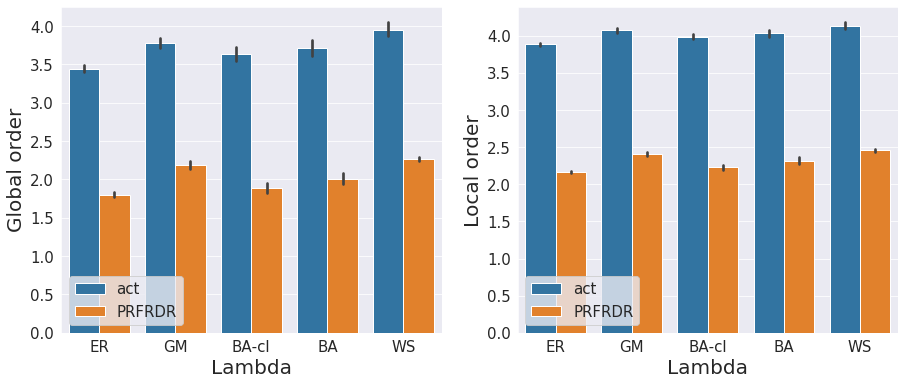

In [77]:
#sns.barplot(x = 'type',y = 'speed',data = df_ind)
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))
sns.barplot(x = 'type',y = 'global_order',units = 'iter',data = mergd, hue = 'model',ax = ax1)
sns.barplot(x = 'type',y = 'lcl_order',units = 'iter',data = mergd, hue = 'model', ax = ax2)
ax1.set_ylabel('Global order',fontsize = 20)
ax1.set_xlabel('Lambda',fontsize = 20)

ax2.set_ylabel('Local order',fontsize = 20)
ax2.set_xlabel('Lambda',fontsize = 20)

ax1.legend(fontsize = 15,loc = 3)
ax2.legend(fontsize = 15)
plt.show()

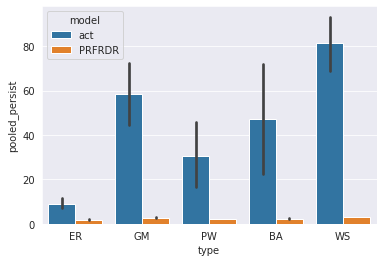

In [38]:
sns.barplot(x = 'type',y = 'pooled_persist',data = mergd,units = 'iter',hue = 'model')

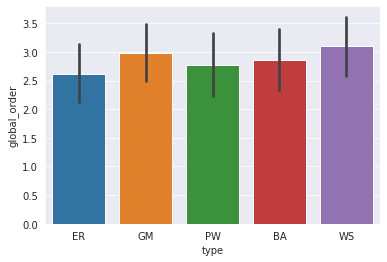

In [41]:
sns.barplot(x = 'type',y = 'global_order',data = mergd, units = 'iter')

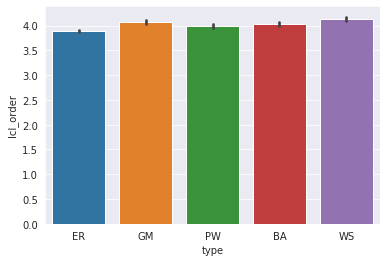

In [40]:
sns.barplot(x = 'type',y = 'lcl_order',data = df_glob)

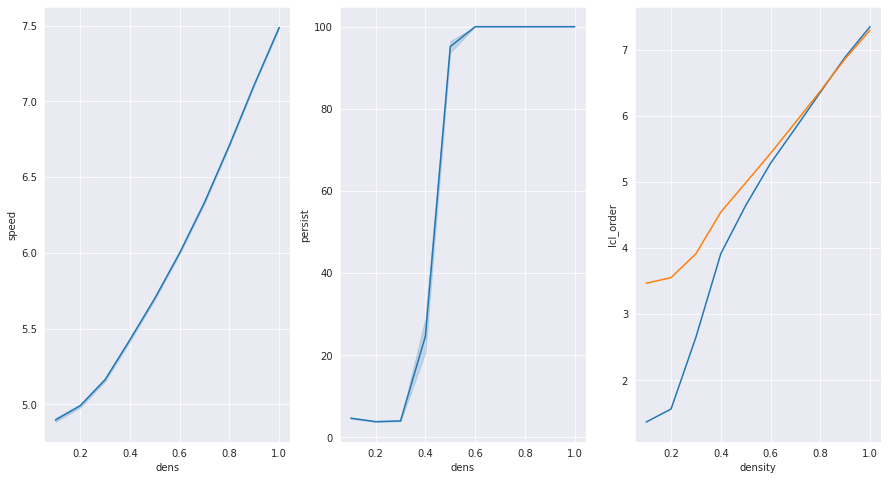

In [4]:
f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (15,8))
sns.lineplot(x = 'dens',y = 'speed',data = df_ind,ax = ax1)
sns.lineplot(x = 'dens',y = 'persist',data = df_ind,ax = ax2)
sns.lineplot(x = 'density',y = 'global_order',data = df_glob,ax = ax3)
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax3,legend = 'brief')

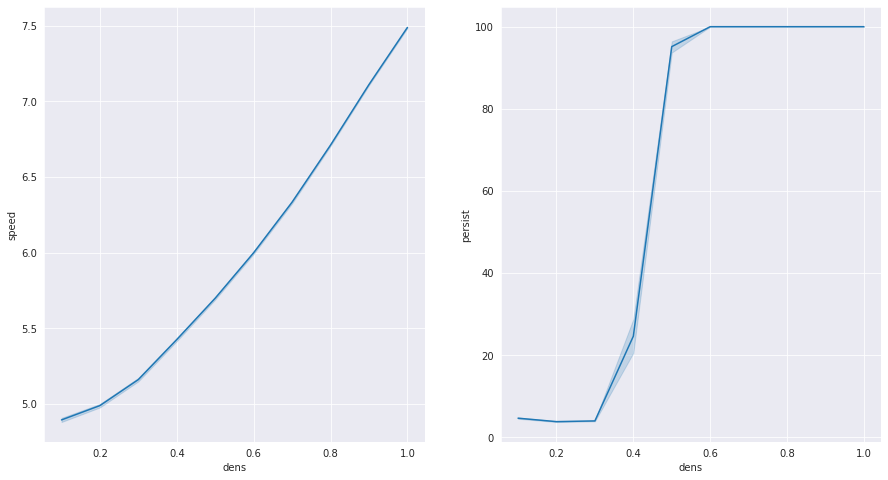

In [28]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.lineplot(x = 'dens',y = 'speed',data = df_ind,ax = ax1)
sns.lineplot(x = 'dens',y = 'persist',data = df_ind,ax = ax2)

In [30]:
print(df_glob.head())
df_glob['norm_order']= df_glob.sum_order / (df_glob.density * 217)
df_glob['norm_lcl'] = df_glob.lcl_order/ (df_glob.density * 217)

   density  pooled_persist   global_order   sum_order  std_sum_order  \
0      0.1        4.671551    3387.940285   29.731515      11.947164   
1      0.5      100.000000  221381.269790  503.760156      42.344826   
2      0.6      100.000000  331912.321180  687.584452      42.853246   
3      0.4       10.952611  153914.820458  339.797938      36.030733   
4      0.2        3.821361    9026.934950   68.021531      27.022808   

   lcl_order   std_lcl  
0   3.468526  1.160606  
1   4.985369  0.771029  
2   5.431023  0.676993  
3   4.542540  0.874978  
4   3.552622  1.176444  


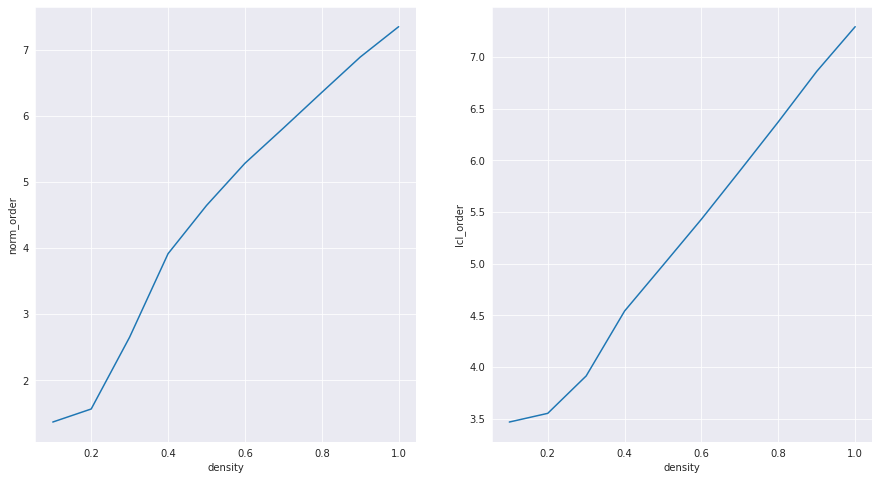

In [33]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.lineplot(x = 'density',y = 'norm_order',data = df_glob,ax = ax1)
#sns.lineplot(x = 'density',y = 'sum_order',data = df_glob,ax = ax2)
#sns.lineplot(x = 'density',y = 'sum_order',data = df_glob,ax = ax2)#,size = 'std_sum_order'
#sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax2)
#sns.lineplot(x = 'density',y = 'norm_lcl',data = df_glob,ax = ax2)#,size = 'std_lcl'
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax2)#,size = 'std_lcl'

In [17]:
df_glob.density.unique()

array([0.1, 0.5, 0.6, 0.4, 0.2, 1. , 0.3, 0.7, 0.9, 0.8])

In [19]:
df_glob.count()

density          10
global_order     10
sum_order        10
std_sum_order    10
lcl_order        10
std_lcl          10
dtype: int64

In [3]:
np.linspace(500,1500,11)


array([ 500.,  600.,  700.,  800.,  900., 1000., 1100., 1200., 1300.,
       1400., 1500.])

In [6]:
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [8]:
 np.linspace(500,3000,6)

array([ 500., 1000., 1500., 2000., 2500., 3000.])